<a href="https://colab.research.google.com/github/ngsanthosh2006/Recognizing-handwritten-digits-with-learning-for-smartes-AI-application-/blob/main/Santhoshini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8611 - loss: 0.4764 - val_accuracy: 0.9644 - val_loss: 0.1249
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9656 - loss: 0.1146 - val_accuracy: 0.9697 - val_loss: 0.1005
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9760 - loss: 0.0748 - val_accuracy: 0.9739 - val_loss: 0.0905
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9837 - loss: 0.0524 - val_accuracy: 0.9743 - val_loss: 0.0933
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9865 - loss: 0.0428 - val_accuracy: 0.9727 - val_loss: 0.1011
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9669 - loss: 0.1096
Test Accuracy: 0.9731
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


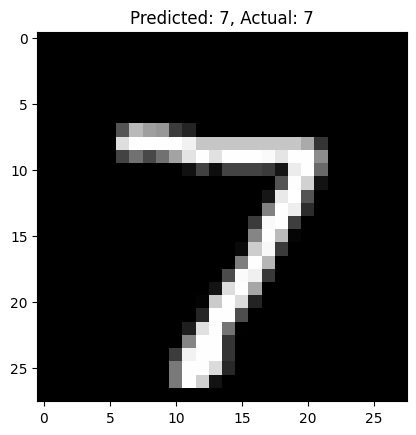

In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize input images
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encode the labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Build the DNN model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train_cat, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f'Test Accuracy: {test_acc:.4f}')

# Predict and visualize
predictions = model.predict(x_test)

# Display example prediction
index = 0
plt.imshow(x_test[index], cmap='gray')
plt.title(f"Predicted: {predictions[index].argmax()}, Actual: {y_test[index]}")
plt.show()